In [1]:
from matplotlib import pyplot
import numpy
import pandas
import scipy.integrate
import seaborn

import herd
import herd.initial_conditions
import run_common
import run_one

simulation #1 ended after 365 days.


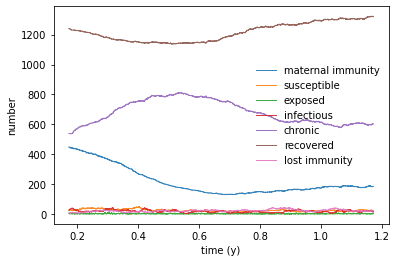

In [2]:
p = herd.Parameters(SAT=1)
RVs = herd.RandomVariables(p)

tmax = 1
seed = 1
data = run_common.run_one(p, tmax, seed, debug=False)
run_one.make_plot(data)

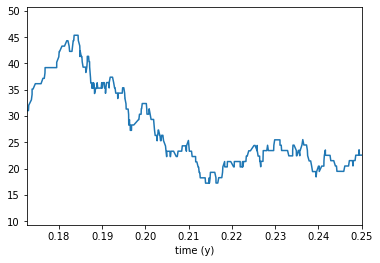

In [3]:
# The force of infection in the simulation.
force_of_infection = (RVs.transmission_rate * data['infectious']
                      + RVs.chronic_transmission_rate * data['chronic'])
ax = force_of_infection.plot()
ax.autoscale(enable=True, axis='x', tight=True)
_ = ax.set_xlim(right=0.25)

In [4]:
# The force of infection implied by the large-population limit of the initial conditions.
ages = numpy.linspace(0, 20, 101)
P = RVs.initial_conditions.pdf(ages)
# Integrate over age.
P = P.apply(scipy.integrate.trapz, args=(ages, ))
p.transmission_rate * P['infectious'] + p.chronic_transmission_rate * P['chronic']

11.812953716799978

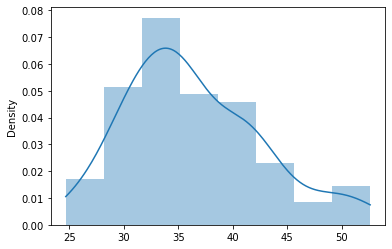

In [5]:
# The force of infection from sample initial conditions.
nsamples = 100
force_of_infection = []
for _ in range(nsamples):
    sample = RVs.initial_conditions.rvs()
    sample = {k: len(v) for (k, v) in sample.items()}
    force_of_infection.append(RVs.transmission_rate * sample['infectious']
                              + RVs.chronic_transmission_rate * sample['chronic'])

_ = seaborn.histplot(force_of_infection, stat='density',
                     kde=True, kde_kws=dict(cut=0),
                     linestyle='None', alpha=0.4)